## Линейная ренгрессия

## Лабораторная работа №4

## Вариант №8

## Бубнов Евгений 19-ивт-2

In [521]:
# Подключаем библиотеки
from pandas import read_csv,concat

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from scipy.stats import pearsonr,spearmanr

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils

In [522]:
# Подгружаем данные
df = read_csv(r"autos.csv",",", encoding = 'latin1')

In [523]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


## 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

| Переменная   | Описание  |
|:--------------|:--------------|
| dateCrawled | даты обхода |
| name | имя автомобиля |
| seller | продавец: частный или дилер |
| offerType |  цена автомобиля |
| price | цена |
| abtest |  |
| vehicleType | Тип авто |
| yearOfRegistration | год регистрации: в каком году автомобиль был впервые зарегистрирован |
| gearbox | коробка передач |
| powerPS | мощность автомобиля в л. с. |
| model | модель |
| kilometer | километр : сколько километров проехал автомобиль |
| monthOfRegistration | месяц регистрации : в каком месяце автомобиль был впервые зарегистрирован |
| brand | марка |
| notRepairedDamage |  не отремонтированные повреждения |
| dateCreated |  дата, на которую объявление на eBay было создано |
| nrOfPictures | Кол-во фотографии: количество фотографий в объявлении (к сожалению, это поле содержит везде 0 и, таким образом, бесполезно (ошибка в crawler!) ) |
| postalCode | индекс |
| lastSeenOnline |  Последний раз видел в сети : когда обходчик увидел это объявление в последний раз в сети |

#### Поля lastSeen и dateCreated могут быть использованы для оценки продолжительности пребывания автомобиля, по крайней мере, в сети перед его продажей.

### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [524]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [525]:
df.shape

(371528, 20)

In [526]:
df = df.drop_duplicates()
df = df.dropna()
df = df.drop(['dateCrawled','offerType','dateCreated','postalCode','lastSeen','name','model'], axis = 1)

In [527]:
df.shape

(260952, 13)

### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [528]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
categorial:  ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


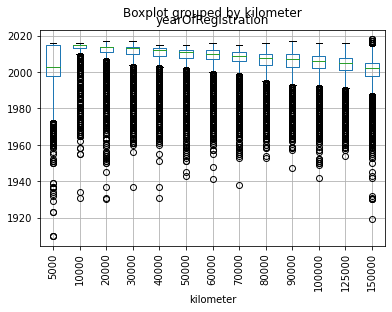

In [529]:
df.boxplot(column='yearOfRegistration',by='kilometer',rot=90)
plt.show()

In [530]:
numerical_columns = [i for i in df.columns if df[i].dtype.name != 'object']
categorial_columns = [i for i in df.columns if df[i].dtype.name == 'object']

print('numerical: ', numerical_columns)
print('categorial: ', categorial_columns)

numerical:  ['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'nrOfPictures']
categorial:  ['seller', 'abtest', 'vehicleType', 'gearbox', 'fuelType', 'brand', 'notRepairedDamage']


In [531]:
# нормализуем
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [532]:
df.head()

,seller,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,nrOfPictures
3,privat,0.000015,test,kleinwagen,0.842593,manuell,0.00375,1.000000,0.500000,benzin,volkswagen,nein,0.0
4,privat,0.000036,test,kleinwagen,0.907407,manuell,0.00345,0.586207,0.583333,diesel,skoda,nein,0.0
5,privat,0.000007,test,limousine,0.787037,manuell,0.00510,1.000000,0.833333,benzin,bmw,ja,0.0
6,privat,0.000022,test,cabrio,0.870370,manuell,0.00545,1.000000,0.666667,benzin,peugeot,nein,0.0
7,privat,0.000000,test,limousine,0.648148,manuell,0.00250,0.241379,0.583333,benzin,volkswagen,nein,0.0


### 4. Выполните замену категориальных признаков;выберите и обоснуйте способ замены

In [533]:
for i in categorial_columns:
    print(i,': ', df[i].unique())

seller :  ['privat' 'gewerblich']
abtest :  ['test' 'control']
vehicleType :  ['kleinwagen' 'limousine' 'cabrio' 'kombi' 'suv' 'bus' 'coupe' 'andere']
gearbox :  ['manuell' 'automatik']
fuelType :  ['benzin' 'diesel' 'lpg' 'andere' 'hybrid' 'cng' 'elektro']
brand :  ['volkswagen' 'skoda' 'bmw' 'peugeot' 'mazda' 'nissan' 'renault' 'ford'
 'mercedes_benz' 'seat' 'honda' 'fiat' 'mini' 'opel' 'smart' 'audi'
 'alfa_romeo' 'subaru' 'mitsubishi' 'hyundai' 'volvo' 'lancia' 'porsche'
 'citroen' 'toyota' 'kia' 'chevrolet' 'dacia' 'suzuki' 'daihatsu'
 'chrysler' 'jaguar' 'rover' 'jeep' 'saab' 'daewoo' 'land_rover' 'trabant'
 'lada']
notRepairedDamage :  ['nein' 'ja']


In [534]:
# выделим бинарные и небинарные признаки
binary_columns = [i for i in categorial_columns if len(df[i].unique()) == 2]
nonbinary_columns = [i for i in categorial_columns if len(df[i].unique()) > 2]

# для бинарных заменим значения на 1 и 0
for col in binary_columns:
    for i, unic_item in enumerate(df[col].unique()):
        df[col] = df[col].replace(to_replace=[unic_item], value=[i])
        
# для не бинарых применим dummy-кодирование
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
df.drop(nonbinary_columns, axis=1, inplace=True)
df = concat([df_nonbinary, df] , axis=1)

print(df.shape)
df.head()

(260952, 64)


,vehicleType_andere,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_andere,fuelType_benzin,...,seller,price,abtest,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,notRepairedDamage,nrOfPictures
3,0,0,0,0,1,0,0,0,0,1,...,0,0.000015,0,0.842593,0,0.00375,1.000000,0.500000,0,0.0
4,0,0,0,0,1,0,0,0,0,0,...,0,0.000036,0,0.907407,0,0.00345,0.586207,0.583333,0,0.0
5,0,0,0,0,0,0,1,0,0,1,...,0,0.000007,0,0.787037,0,0.00510,1.000000,0.833333,1,0.0
6,0,0,1,0,0,0,0,0,0,1,...,0,0.000022,0,0.870370,0,0.00545,1.000000,0.666667,0,0.0
7,0,0,0,0,0,0,1,0,0,1,...,0,0.000000,0,0.648148,0,0.00250,0.241379,0.583333,0,0.0


### 5.Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

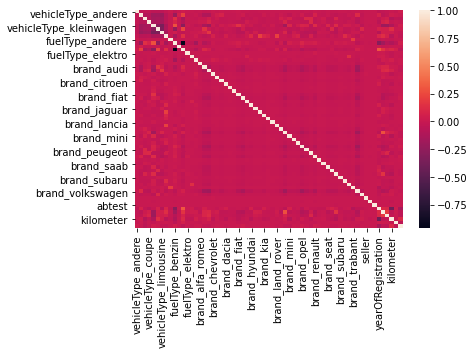

In [535]:
corr_matrix = df.drop(['nrOfPictures'], axis=1).corr()
sns.heatmap(corr_matrix);

### 6.Заполните пропущенные значения в данных

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260952 entries, 3 to 371527
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   vehicleType_andere      260952 non-null  uint8  
 1   vehicleType_bus         260952 non-null  uint8  
 2   vehicleType_cabrio      260952 non-null  uint8  
 3   vehicleType_coupe       260952 non-null  uint8  
 4   vehicleType_kleinwagen  260952 non-null  uint8  
 5   vehicleType_kombi       260952 non-null  uint8  
 6   vehicleType_limousine   260952 non-null  uint8  
 7   vehicleType_suv         260952 non-null  uint8  
 8   fuelType_andere         260952 non-null  uint8  
 9   fuelType_benzin         260952 non-null  uint8  
 10  fuelType_cng            260952 non-null  uint8  
 11  fuelType_diesel         260952 non-null  uint8  
 12  fuelType_elektro        260952 non-null  uint8  
 13  fuelType_hybrid         260952 non-null  uint8  
 14  fuelType_lpg        

### 7.Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказаннымс учётом p-value

In [537]:
# разделим полученные данные на данные для обучения и теста
X, y = df.drop(['price'], axis=1), df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

### 7.1 Линейная регрессия, RIDGE регуляризатор

In [538]:
regr = linear_model.Ridge (alpha = 0.5)
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

173420   -0.000008
182741   -0.000100
271616   -0.000042
218173    0.000011
361460   -0.000031
45771    -0.000034
297004    0.000044
58119    -0.000008
304305    0.000055
183986   -0.000010
274833    0.000051
346765   -0.000058
237316   -0.000016
107975   -0.000007
241922   -0.000035
Name: price, dtype: float64


In [539]:
regr.intercept_

0.00023853995008843882

In [540]:
#regr.intercept_

In [541]:
regr.score(X_test, y_test)

0.00020204940250700965

In [542]:
corr={}
corr['pearson'], _ = pearsonr(pred_regr,y_test)
corr['spearman'], _ = spearmanr(pred_regr,y_test)
print('Корреляция Пирсона: ', corr['pearson'])
print('Корреляция Спирмена: ', corr['spearman'])

Корреляция Пирсона:  0.01486511144657035
Корреляция Спирмена:  0.6741670724136087


### 7.2 Линейная регрессия, LASSO регуляризатор

In [543]:
regr = linear_model.Lasso (alpha = 0.1)
regr.fit(X_train,y_train)
pred_regr = regr.predict(X_test)
print(pred_regr[:15] - y_test[:15])

173420    0.000066
182741   -0.000203
271616    0.000067
218173    0.000064
361460   -0.000083
45771     0.000047
297004    0.000063
58119     0.000050
304305   -0.000004
183986    0.000070
274833    0.000062
346765   -0.000024
237316    0.000053
107975    0.000076
241922   -0.000009
Name: price, dtype: float64


In [544]:
regr.coef_

array([-0.,  0.,  0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0.,  0.,
        0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,
       -0., -0.,  0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,  0.])

In [545]:
regr.intercept_

7.631221239528136e-05

In [546]:
regr.score(X_test, y_test)

-1.4443961375398828e-05

In [547]:
corr = {}
corr['pearson'], _ = pearsonr(pred_regr, y_test)
corr['spearman'], _ = spearmanr(pred_regr, y_test)
print('Корреляция Пирсона: ', corr['pearson'])
print('Корреляция Спирмена: ', corr['spearman'])

Корреляция Пирсона:  nan
Корреляция Спирмена:  nan


E:\Загрузки\WPy64-3910\python-3.9.1.amd64\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
E:\Загрузки\WPy64-3910\python-3.9.1.amd64\lib\site-packages\scipy\stats\stats.py:4196: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
